In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets_531_1056_german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


### Drop Unnecessary Column

In [3]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [4]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [5]:
job_dictionary = {0:"unskilled and non-resident", 1:"unskilled and resident", 2:"skilled", 3:"higly skilled"}
df = df.replace({"Job":job_dictionary})
# df['Mortgage'] = df['Credit amount'] / df['Duration']
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,skilled,own,NaN,little,1169,6,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,radio/TV
2,49,male,unskilled and resident,own,little,NaN,2096,12,education
3,45,male,skilled,free,little,little,7882,42,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,car


In [6]:
df.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [7]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

### Saving account without checking account

In [8]:
df[(df['Saving accounts'].isna() == False) & (df['Checking account'].isna() == True)][['Saving accounts', 'Checking account']].shape

(295, 2)

### Saving account with checking account

In [9]:
df[(df['Saving accounts'].isna() == False) & (df['Checking account'].isna() == False)][['Saving accounts', 'Checking account']].shape

(522, 2)

### Checking account without saving account

In [10]:
df[(df['Saving accounts'].isna() == True) & (df['Checking account'].isna() == False)][['Saving accounts', 'Checking account']].shape

(84, 2)

### Without checking account and saving account

In [11]:
df[(df['Saving accounts'].isna() == True) & (df['Checking account'].isna() == True)][['Saving accounts', 'Checking account']].shape

(99, 2)

In [12]:
295 + 522 + 84 + 99

1000

# EDA

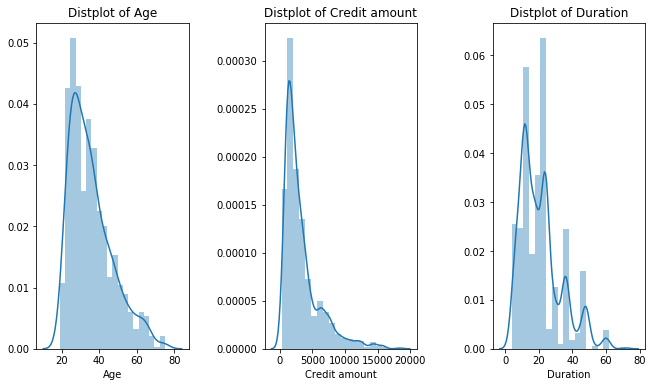

In [13]:

a = plt.figure(1, figsize = (15,6))
n = 0
for x in ['Age', 'Credit amount', 'Duration']:
    n += 1
    plt.subplot(1, 4, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()
a.savefig('dist.png')

Distribution PLot memperlihatkan distribusi data dari Age, Credit amount, dan Duration. Age menunjukan rata2 35, Credit amount menunjukan rata2 3271, dan Duration menunjukan rata2 20.9

In [14]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [15]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [16]:
df.corr()

,Age,Credit amount,Duration
Age,1.000000,0.032716,-0.036136
Credit amount,0.032716,1.000000,0.624984
Duration,-0.036136,0.624984,1.000000


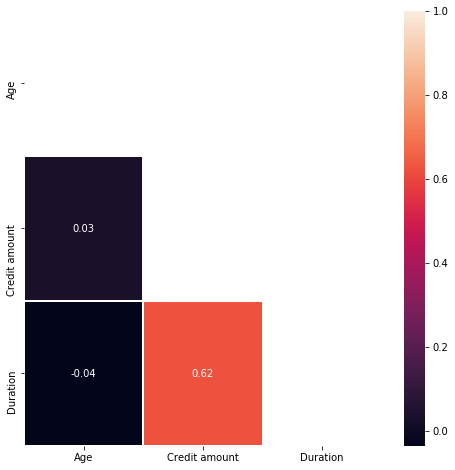

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize= (8,8))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, linewidths = 0.5, annot=True, fmt = ".2f", mask = dropSelf)
plt.show()


In [18]:
df_cat = df[['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Purpose']]

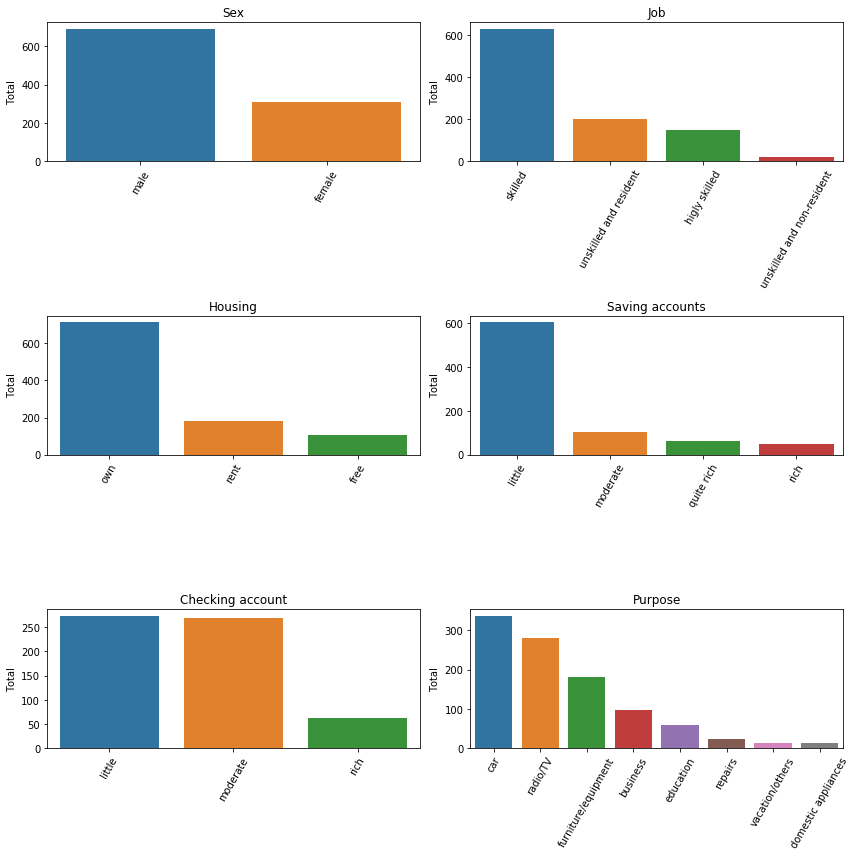

In [19]:
plt.figure(1, figsize = (12,12))
n = 0

for i in df_cat.columns:
    n += 1
    plt.subplot(3, 2, n)
    cat_num = df_cat[i].value_counts()
    title = cat_num.name
    cat_num.name = "Total"
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
    
    chart.y ="Total"
    plt.title(title)
    plt.tight_layout()
plt.tight_layout()
#     plt.show()

Grafik diatas adalah count plot dari categorical data. Grafil tersebut menunjukan bahwa dari orang yang mengambil credit adalah orang yang memiliki job skilled, memiliki rumah, dari saving account dan checing account yang kecil serta didominasi untuk kepentingan pembelian car dan radio/tv

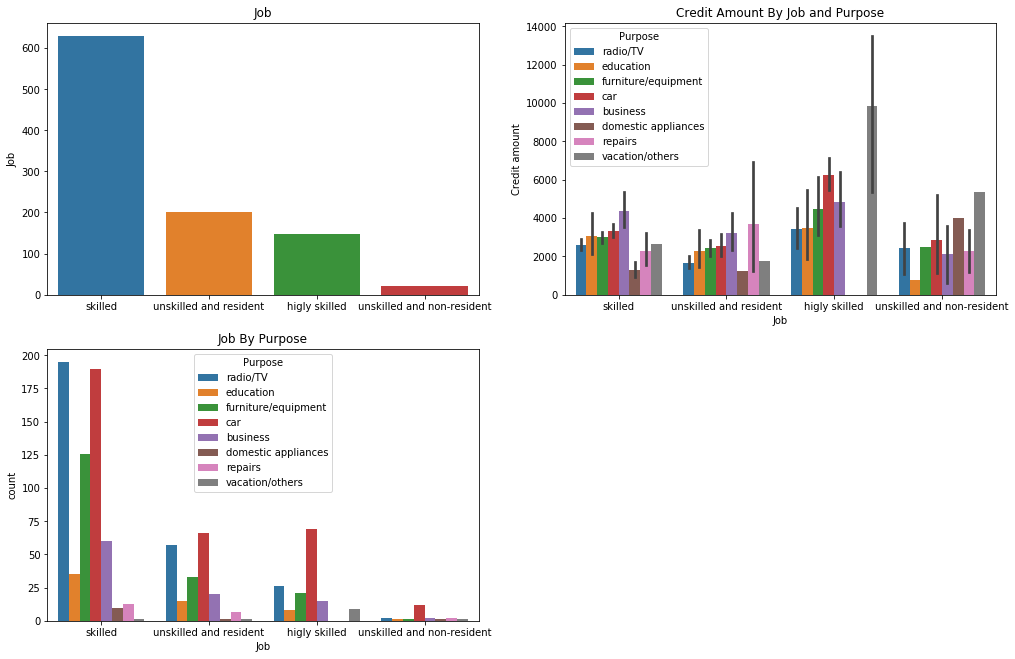

In [20]:
a = plt.figure( figsize = (17,17))

plt.subplot(3, 2, 1)
chart = sns.barplot(x=df_cat['Job'].value_counts().index, y=df_cat['Job'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Job')

plt.subplot(3, 2, 2)
box = sns.barplot(x='Job',y='Credit amount', hue= 'Purpose', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('Credit Amount By Job and Purpose')

plt.subplot(3, 2, 3)
sns.countplot('Job', data = df, hue = 'Purpose')
plt.title('Job By Purpose')

plt.tight_layout(pad=2, h_pad=3, w_pad=1, rect=(3,100,10,3))
a.savefig('job.png')

Grafik diatas memperlihatkan dari sisi Job yang dimana orang yang ber skilled cenderung meminjam uang car dan radio, akan tetapi dari segi banyaknya uang yang dipinjam yang paling tinggi adalah untuk keperluan bisnis yang dimana jumlah peminjam untuk keperluan bisnis tidak sebanyak car dan radio/tv. Hal yang menarik lagi adalah orang yang highly skilled cenderung meminjam uang dengan jumlah yang tinggi untuk vacation

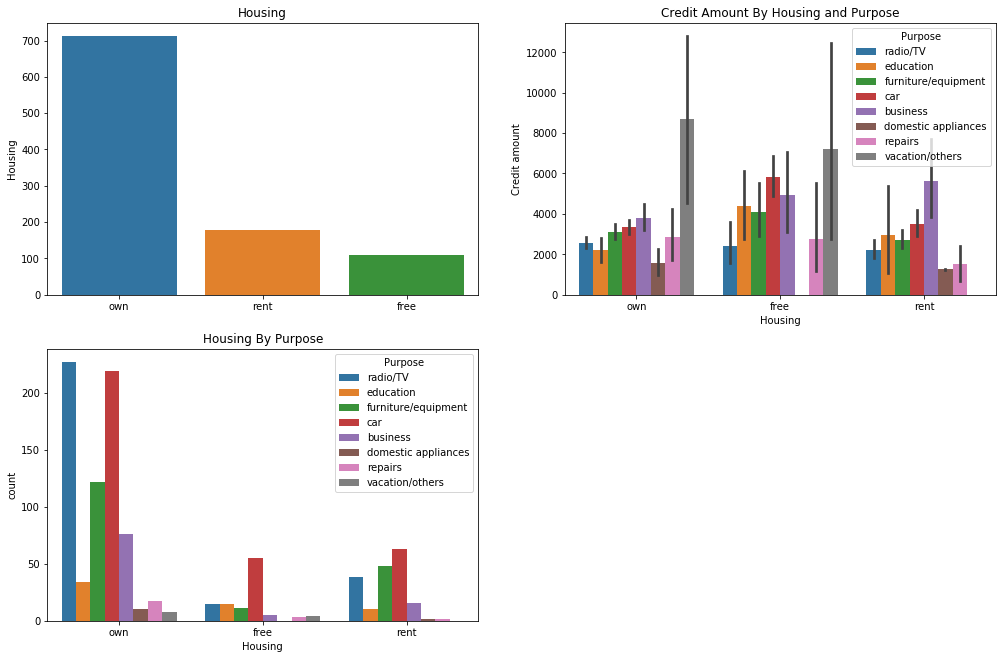

In [21]:
a = plt.figure( figsize = (17,17))

plt.subplot(3, 2, 1)
chart = sns.barplot(x=df_cat['Housing'].value_counts().index, y=df_cat['Housing'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Housing')

plt.subplot(3, 2, 2)
box = sns.barplot(x='Housing',y='Credit amount', hue= 'Purpose', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('Credit Amount By Housing and Purpose')

plt.subplot(3, 2, 3)
sns.countplot('Housing', data = df, hue = 'Purpose')
plt.title('Housing By Purpose')

plt.tight_layout(pad=2, h_pad=1, w_pad=1, rect=(3,100,10,3))
a.savefig('housing.png')

Grafik dari segi housing menunjukan bahwa orang yang memiliki rumah cenderung untuk meminjam uang di bank. Peminjaman tersebut diguanakan untuk car dan radio serta amount yang paling tinggi adalah untuk vacation.

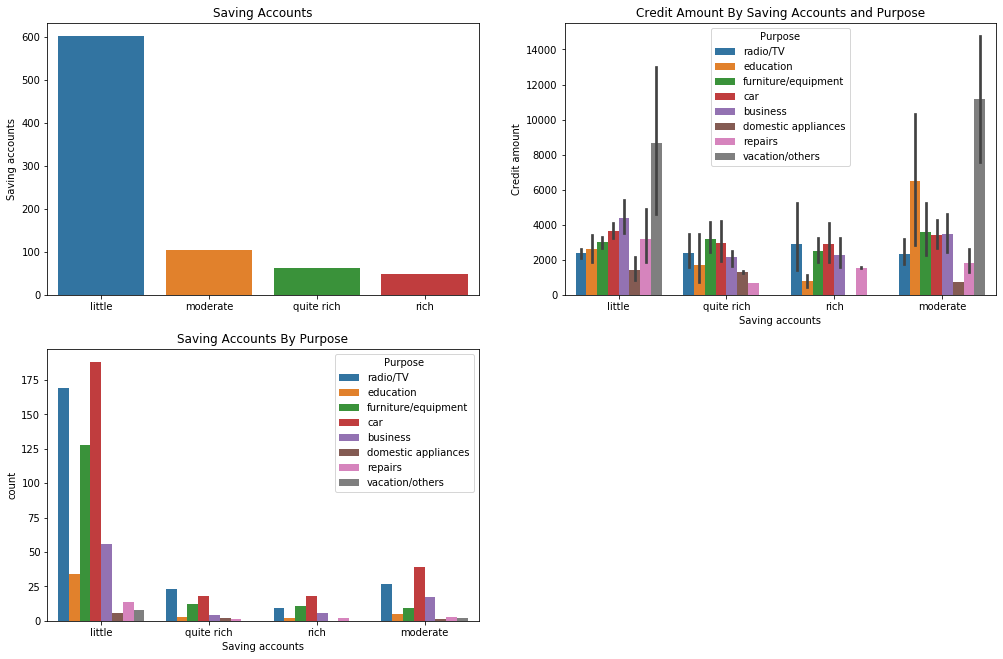

In [22]:
a = plt.figure( figsize = (17,17))

plt.subplot(3, 2, 1)
chart = sns.barplot(x=df_cat['Saving accounts'].value_counts().index, y=df_cat['Saving accounts'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Saving Accounts')

plt.subplot(3, 2, 2)
box = sns.barplot(x='Saving accounts',y='Credit amount', hue= 'Purpose', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('Credit Amount By Saving Accounts and Purpose')

plt.subplot(3, 2, 3)
sns.countplot('Saving accounts', data = df, hue = 'Purpose')
plt.title('Saving Accounts By Purpose')

plt.tight_layout(pad=2, h_pad=1, w_pad=1, rect=(3,100,10,3))
a.savefig('saving.png')

Grafik dari segi saving account menunjukan bahwa orang yang memiliki tabungan kecil untuk meminjam uang di bank. Peminjaman tersebut diguanakan untuk car dan radio serta amount yang paling tinggi adalah untuk vacation.

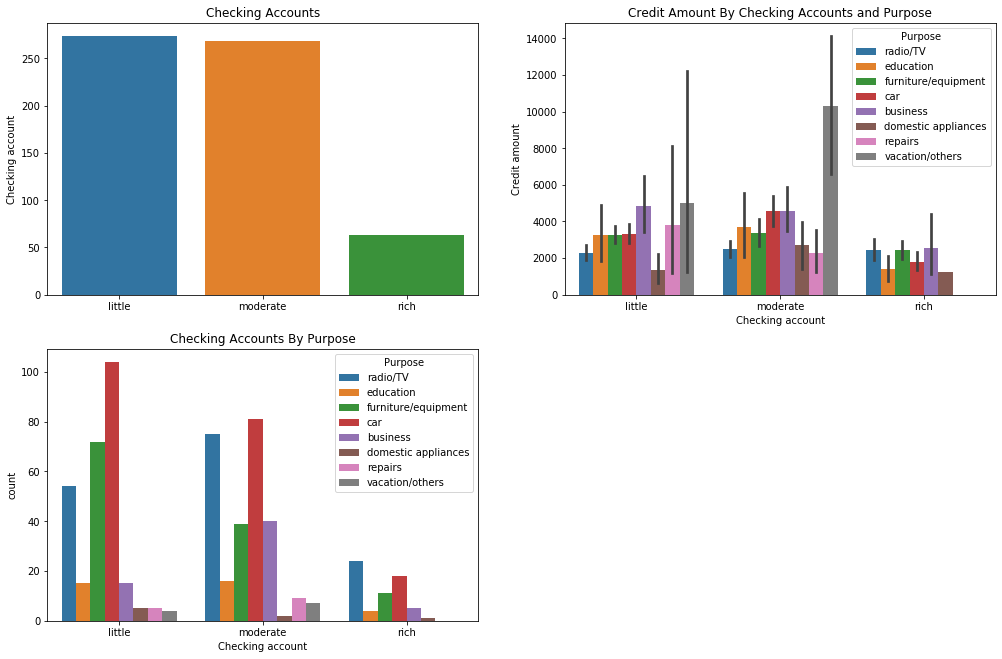

In [23]:
a = plt.figure( figsize = (17,17))

plt.subplot(3, 2, 1)
chart = sns.barplot(x=df_cat['Checking account'].value_counts().index, y=df_cat['Checking account'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Checking Accounts')

plt.subplot(3, 2, 2)
box = sns.barplot(x='Checking account',y='Credit amount', hue= 'Purpose', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('Credit Amount By Checking Accounts and Purpose')

plt.subplot(3, 2, 3)
sns.countplot('Checking account', data = df, hue = 'Purpose')
plt.title('Checking Accounts By Purpose')

plt.tight_layout(pad=2, h_pad=1, w_pad=1, rect=(3,100,10,3))
a.savefig('checking.png')

Grafik dari segi checking account menunjukan bahwa orang yang memiliki tabungan giro kecil dan moderate juga cenderung untuk meminjam uang di bank. Peminjaman tersebut diguanakan untuk car dan radio serta amount yang paling tinggi adalah untuk vacation.

In [24]:
# sns.catplot('Job', 'Age',data = df, kind="swarm")

In [25]:
# plt.plot(df['Credit amount'], df['Duration'],'.b')

# Building Model

In [26]:
df_num = df[['Age', 'Credit amount', 'Duration']]

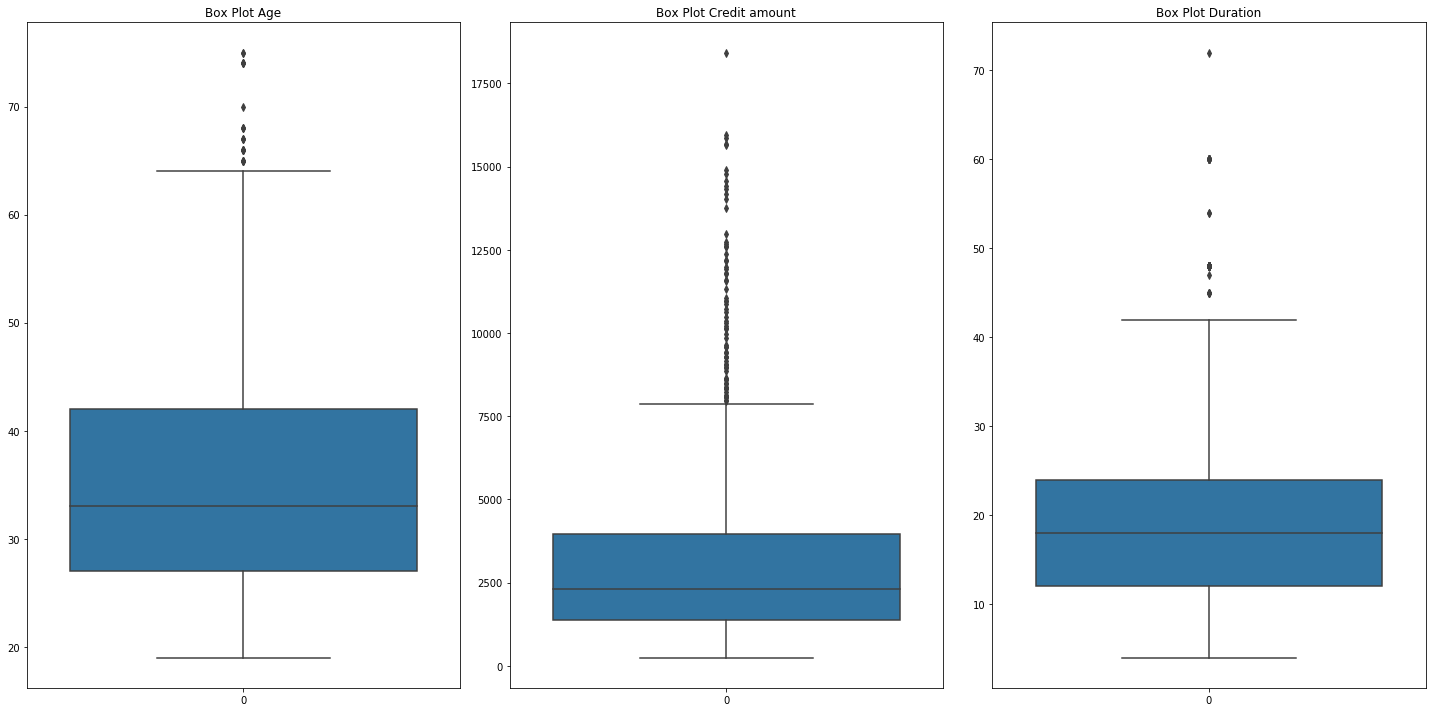

In [27]:
f, axes = plt.subplots(1, 3, figsize = (20,10))

sns.boxplot(data = df_num['Age'], ax = axes[0]).set_title('Box Plot Age')
sns.boxplot(data = df_num['Credit amount'], ax = axes[1]).set_title('Box Plot Credit amount')
sns.boxplot(data = df_num['Duration'], ax = axes[2]).set_title('Box Plot Duration')

plt.tight_layout()
f.savefig('box.png')

In [28]:
from mahalanobis import Mahalanobis

In [29]:
from scipy.stats import chi2

In [30]:
df_num['mahala_pack'] = Mahalanobis(np.array(df_num),len(df_num)).distances

In [31]:
df_num['p-value'] = 1 - chi2.cdf(df_num['mahala_pack'], 2)

In [32]:
def name_outlier(col):
    if col < 0.01:
        return 'Outlier'
    else:
        return 'Not-outlier'
df_num['Out'] = df_num['p-value'].apply(name_outlier)

<Figure size 1224x1224 with 0 Axes>

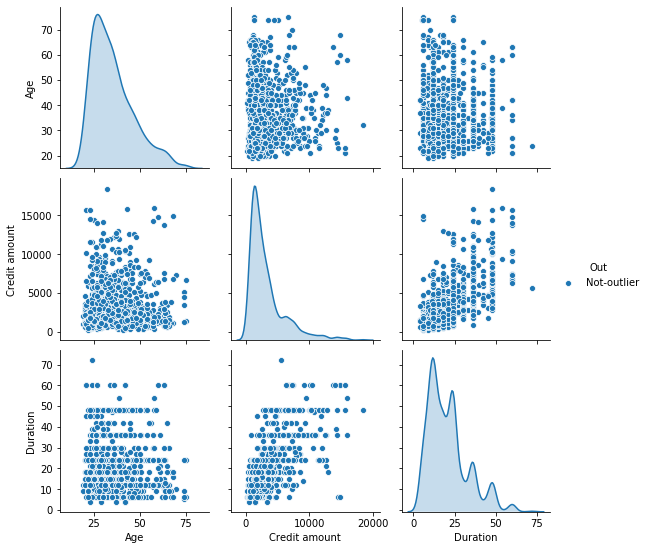

In [33]:
a = plt.figure( figsize = (17,17))

sns.pairplot(df_num[['Age', 'Credit amount', 'Duration', 'Out']], hue = 'Out')
a.savefig('mahala.jpg')

In [34]:
df[df_num['Out'] == 'Outlier']

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose


Saya ingin membanginkan antara univariate outlier dengan multivarite outlier untuk memperlihatkan apakah outlier tersebut ketika di bangingkan dengan banyak feature apakah masih terhintung outlier atau tidak. Haislnya menujukan bahwa ketika diplot sebagai multivariate outlier data sama sekali tidak memiliki outlier.

### Scalling

In [35]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [36]:
df_num['Age Scl'] = StandardScaler().fit_transform(df_num[['Age']])
df_num['Credit amount Scl'] = StandardScaler().fit_transform(df_num[['Credit amount']])
df_num['Duration Scl'] = StandardScaler().fit_transform(df_num[['Duration']])
# df_num['Mortgage Scl'] = StandardScaler().fit_transform(df_num[['Mortgage']])

Saya menggunakan StandardScaler dikarenakan secara multivariate outlier data tidak menunjukkan adanya outlier dan saya ingin men scale data untuk cenderung ke normal distribusi.

### K-Means Clustering

#### **Pilihan User Segmentation**
Pada dataset di atas terdapat feature pada user yang bisa digunakan untuk user segmentation:
1. Age (__Demographic__)
2. Credit Amount (__Behavioral Data__)
3. Duration (__Behavioral Data__)


Berdasarkan teori dan ketersediaan feature pada dataset, maka pilihan user segmentation: __Demographic information dan Behavioral Data__.

**Pertama**, user segmentation berdasarkan skor belanja dan potensi konsumen menggunakan data ``Age``, ``Credit Amount`` dan ``Duration`` menggunakan Kmeans.

**Kedua**, setelah segmentasi pertama kita dapatkan cluster-cluster berdasarkan data pertama. Setelah itu tiap cluster akan dieksplorasi berdasarkan barplot dari kategorical data 

In [37]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [38]:
k = range(1, 10)
inertia = []

for i in k:
    model = KMeans(n_clusters = i)
    model.fit(df_num[['Age Scl', 'Credit amount Scl', 'Duration Scl']])
    inertia.append(model.inertia_)
print(k)
print(inertia)

range(1, 10)
[3000.0, 1884.9567936123753, 1297.4351280370574, 1066.6096184937614, 943.4531977224741, 834.6742526459052, 745.9204912920129, 688.8537110101083, 637.0527607990334]


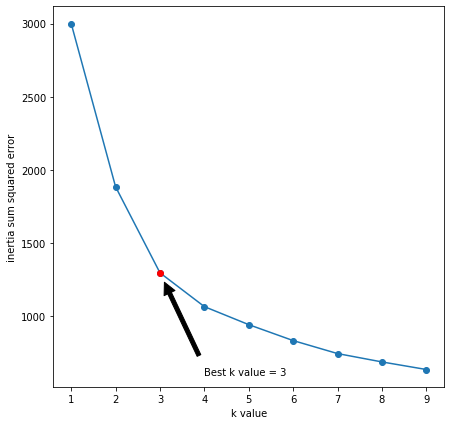

In [39]:
a = plt.figure( figsize = (7,7))
plt.plot(k, inertia, marker='o')
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.plot(k[2], inertia[2], 'ro')
plt.annotate(
'Best k value = 3', xy = (k[2], inertia[2]), xytext = (4, 600),
arrowprops = dict(facecolor = 'black', shrink = 0.1))
a.savefig('Elbow.png')

In [40]:
model_KM = KMeans(n_clusters = 3, random_state = 0, max_iter = 1000) # tingkatkan itersai untuk meningkatkan kualitas prediksi

model_KM.fit(df_num[['Age Scl', 'Credit amount Scl', 'Duration Scl']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [41]:
df_num['Cluster'] = model_KM.predict(df_num[['Age Scl', 'Credit amount Scl', 'Duration Scl']])
df_num.head()

,Age,Credit amount,Duration,mahala_pack,p-value,Out,Age Scl,Credit amount Scl,Duration Scl,Cluster
0,67,1169,6,2.995263,0.223659,Not-outlier,2.766456,-0.745131,-1.236478,0
1,22,5951,48,2.558165,0.278292,Not-outlier,-1.191404,0.949817,2.248194,1
2,49,2096,12,1.373223,0.503279,Not-outlier,1.183312,-0.416562,-0.738668,0
3,45,7882,42,2.064621,0.356183,Not-outlier,0.831502,1.634247,1.750384,1
4,53,4870,24,1.619817,0.444899,Not-outlier,1.535122,0.566664,0.256953,0


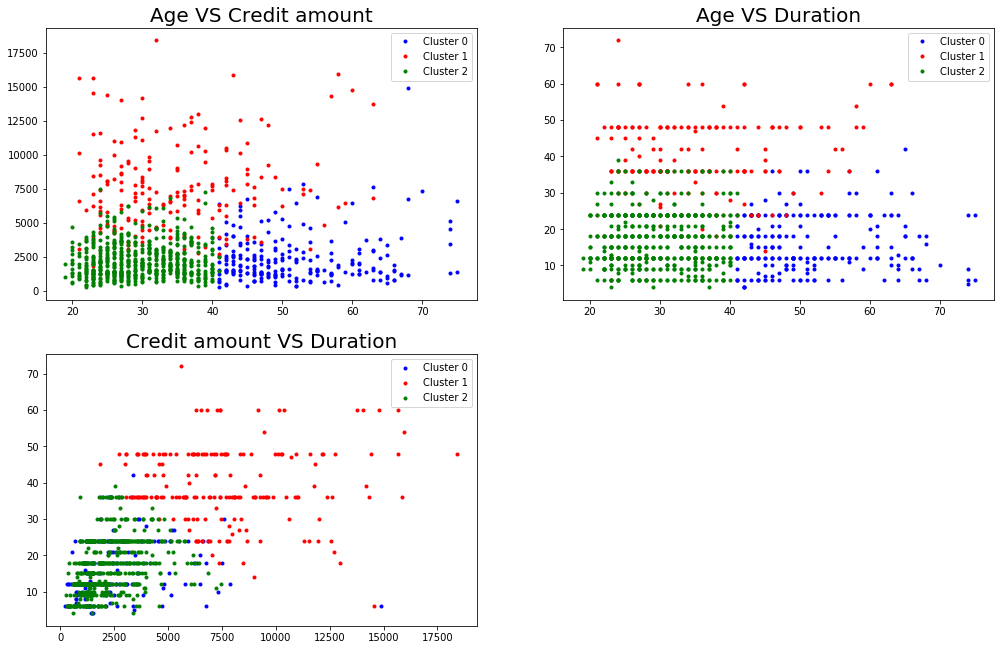

In [42]:
a = plt.figure( figsize = (17,17))

plt.subplot(3, 2, 1)
a_0 = plt.plot(df_num['Age'][df_num['Cluster'] == 0], df_num['Credit amount'][df_num['Cluster'] == 0], 'b.')
a_1 = plt.plot(df_num['Age'][df_num['Cluster'] == 1], df_num['Credit amount'][df_num['Cluster'] == 1], 'r.')
a_2 = plt.plot(df_num['Age'][df_num['Cluster'] == 2], df_num['Credit amount'][df_num['Cluster'] == 2], 'g.')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2'), loc='best')
plt.title('Age VS Credit amount', fontsize = 20)

plt.subplot(3, 2, 2)
b_0 = plt.plot(df_num['Age'][df_num['Cluster'] == 0], df_num['Duration'][df_num['Cluster'] == 0], 'b.')
b_1 = plt.plot(df_num['Age'][df_num['Cluster'] == 1], df_num['Duration'][df_num['Cluster'] == 1], 'r.')
b_2 = plt.plot(df_num['Age'][df_num['Cluster'] == 2], df_num['Duration'][df_num['Cluster'] == 2], 'g.')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2'), loc='best')
plt.title('Age VS Duration', fontsize = 20)

plt.subplot(3, 2, 3)
c_0 = plt.plot(df_num['Credit amount'][df_num['Cluster'] == 0], df_num['Duration'][df_num['Cluster'] == 0], 'b.')
c_1 = plt.plot(df_num['Credit amount'][df_num['Cluster'] == 1], df_num['Duration'][df_num['Cluster'] == 1], 'r.')
c_2 = plt.plot(df_num['Credit amount'][df_num['Cluster'] == 2], df_num['Duration'][df_num['Cluster'] == 2], 'g.')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2'), loc='best')
plt.title('Credit amount VS Duration', fontsize = 20)


# plt.subplot(3, 2, 3)
# sns.countplot('Checking account', data = df, hue = 'Purpose')

plt.tight_layout(pad=2, h_pad=1, w_pad=1, rect=(3,100,10,3))
a.savefig('2d.png')

In [43]:
from mpl_toolkits.mplot3d import Axes3D

K-MEANS


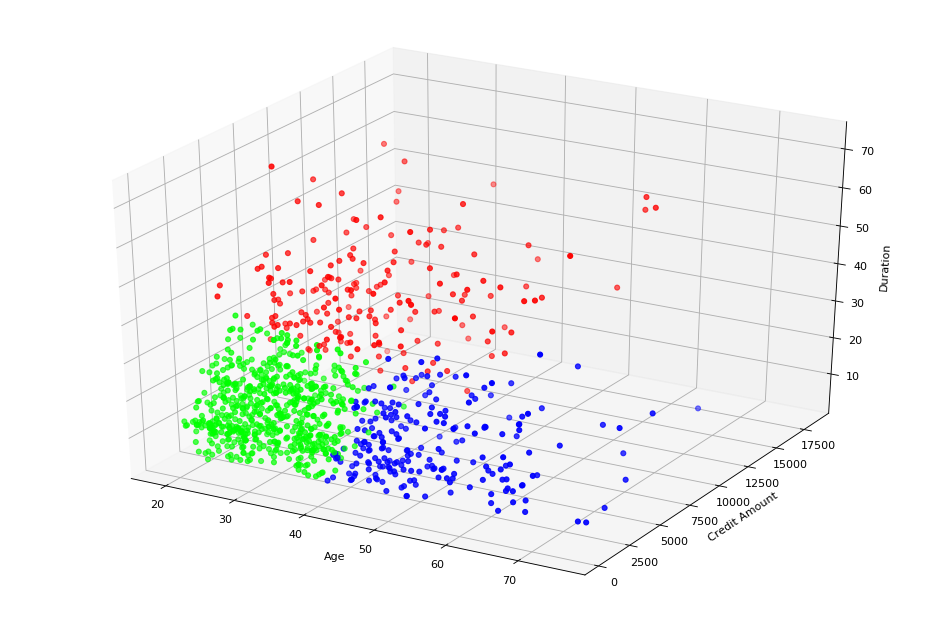

In [44]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df['Age'],df['Credit amount'],df['Duration'],c=df_num['Cluster'], cmap='brg')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("K-MEANS")
fig.savefig('3d.png')

Hasil dari clustering menghasilkan 3 cluster yaitu cluster 0, 1, 2. CLuster 0 dan cluster 2 dapat memisahkan Age menjadi dua cluster. Cluster 1 dan cluster 2 dapat memisahkan Credit amount menjadi dua cluster. Cluster 1 cenderung memiliki persebaran age dari seluruh data.

### DBSCAN Clustering

In [45]:
from sklearn.cluster import DBSCAN 

In [46]:
db_default = DBSCAN(eps = 0.5, min_samples = 4).fit(df_num[['Age Scl', 'Credit amount Scl', 'Duration Scl']]) 
labels = db_default.labels_

In [47]:
pd.DataFrame(labels)[0].unique()

array([ 0, -1,  3,  1,  4,  2], dtype=int64)

In [48]:
from mpl_toolkits.mplot3d import Axes3D

DBSCAN


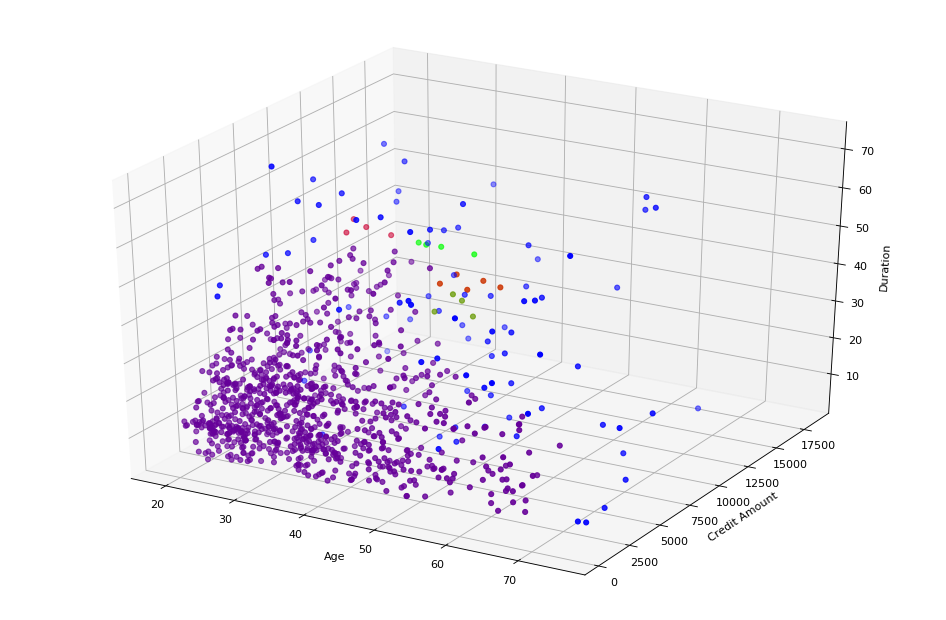

In [49]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df['Age'],df['Credit amount'],df['Duration'],c=labels, cmap='brg')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("DBSCAN")

Hasil clustering dari DBSCAN menghasilkan 4 cluster yang dimana dari cluster tersebut clustering tidak terlalu bisa untuk memisahkan data age, duration, dan credit amount. Sehingga model yang terpakai adalah K-MEANS clustering.

In [50]:
kmeans_labels = model_KM.labels_

In [51]:
df_clustered = df.assign(Cluster=kmeans_labels)

In [52]:
df_clustered.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,0
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,1
2,49,male,unskilled and resident,own,little,NaN,2096,12,education,0
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,1
4,53,male,skilled,free,little,little,4870,24,car,0


In [53]:
grouped_kmeans = df_clustered.groupby(['Cluster'])
grouped_kmeans.mean().round(1)

,Age,Credit amount,Duration
Cluster,,,
0,51.7,2398.5,15.8
1,34.7,7587.2,39.3
2,29.7,2205.5,16.9


In [54]:
kelas = pd.DataFrame({'Cluster': ['Cluster 0', 'Cluster 1','Cluster 2'], 'Age Min': [41, 21, 19], 'Age Max': [75, 63, 41],
             'Credit Amount Min': [250, 1845, 276], 'Credit Amount Max': [14896, 18424, 7472], 'Duration Min': [4, 6, 4], 'Duration Max': [42, 72, 39]})

In [55]:
kelas

,Cluster,Age Min,Age Max,Credit Amount Min,Credit Amount Max,Duration Min,Duration Max
0,Cluster 0,41,75,250,14896,4,42
1,Cluster 1,21,63,1845,18424,6,72
2,Cluster 2,19,41,276,7472,4,39


In [56]:
def label(data):
    if data == 0:
        return 'Bad'
    if data == 1:
        return 'Good'
    if data == 2:
        return 'Medium'

Hasil dari cluster tersebut saya bikin simbol untuk dari ketiga cluster tersebut. Cluster 0 adalah Bad karena uumur dan jumlah credit amount cenderung tua dan waktunya sedang. Cluster 1 adalah Good karena umur dan ccredit amount nya cenderung palling tingga peminjamannya dan waktunya juga cukup lama dikarenakan biasanya untuk semakin besar peminjaman dari bank, akan diberi waktu yang lama juga untuk pengembalian uangnya. Cluster 2 adalah Medium yang memiliki umur muda dimana oarang muda adalah orang yang masih sangat produktif, credit amount yang sedang, dan durasi yang sedang juga. 

In [57]:
df_clustered['Cluster_name'] = df_clustered['Cluster'].apply(label)

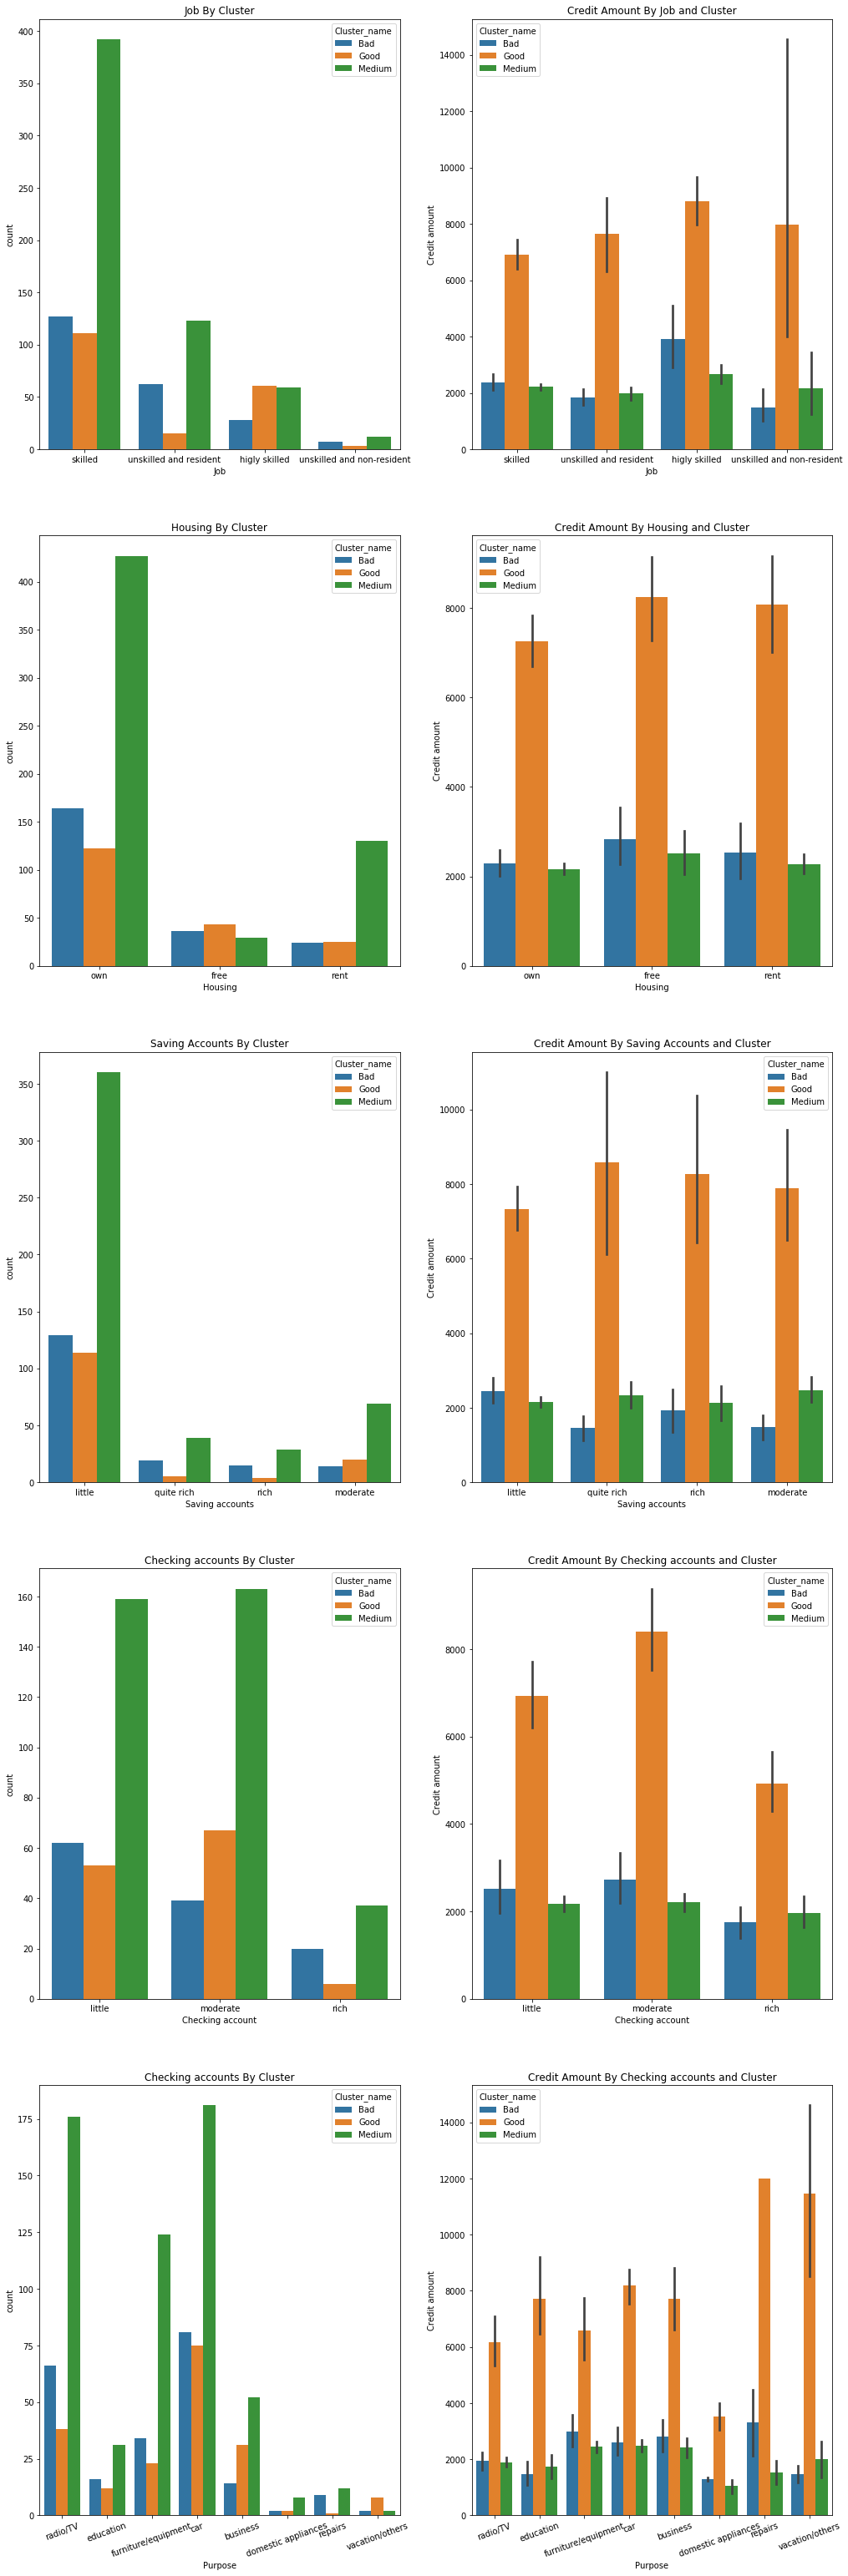

In [58]:
a = plt.figure( figsize = (17,55))

plt.subplot(5, 2, 1)
chart = sns.countplot('Job', data = df_clustered, hue = 'Cluster_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Job By Cluster')

plt.subplot(5, 2, 2)
box = sns.barplot(x = 'Job',y = 'Credit amount', hue = 'Cluster_name', data=df_clustered)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('Credit Amount By Job and Cluster')

plt.subplot(5, 2, 3)
chart = sns.countplot('Housing', data = df_clustered, hue = 'Cluster_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Housing By Cluster')

plt.subplot(5, 2, 4)
box = sns.barplot(x = 'Housing',y = 'Credit amount', hue = 'Cluster_name', data=df_clustered)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('Credit Amount By Housing and Cluster')

plt.subplot(5, 2, 5)
chart = sns.countplot('Saving accounts', data = df_clustered, hue = 'Cluster_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Saving Accounts By Cluster')

plt.subplot(5, 2, 6)
box = sns.barplot(x = 'Saving accounts',y = 'Credit amount', hue = 'Cluster_name', data=df_clustered)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('Credit Amount By Saving Accounts and Cluster')

plt.subplot(5, 2, 7)
chart = sns.countplot('Checking account', data = df_clustered, hue = 'Cluster_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Checking accounts By Cluster')

plt.subplot(5, 2, 8)
box = sns.barplot(x = 'Checking account',y = 'Credit amount', hue = 'Cluster_name', data=df_clustered)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('Credit Amount By Checking accounts and Cluster')

plt.subplot(5, 2, 9)
chart = sns.countplot('Purpose', data = df_clustered, hue = 'Cluster_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=20)
plt.title('Checking accounts By Cluster')

plt.subplot(5, 2, 10)
box = sns.barplot(x = 'Purpose',y = 'Credit amount', hue = 'Cluster_name', data=df_clustered)
box.set_xticklabels(box.get_xticklabels(), rotation=20)
plt.title('Credit Amount By Checking accounts and Cluster')

plt.tight_layout(pad=2, h_pad=1, w_pad=1, rect=(3,100,10,3))
a.savefig('catclus.png')

Grafik dari Job, Housing , Saving account, dan Checking account serta credit amount, dapat disimpulkan bahwa pihak bank masih dapat meningkatkan kuantitas dari kluster good yang dimana cluster ini cenderung meminjam dengan jumlah yang banyak dan dapat dibikinkan produk-produk dari pertimbangan Purpose yang mendukung cluster good untuk meminjam uang atau menabung di bank sehingga meningkatkan penjualan dari segi marketing.